CUSTOMER SEGMENTATION ANALYSIS

Customer Segmentation is a data analysis process used by businesses to group customers based on similar characteristics, behaviors, or purchasing patterns. Instead of treating all customers equally, segmentation helps organizations understand different customer groups and their specific needs.

By analyzing customer data, businesses can identify high-value customers, understand buying behavior, improve targeted marketing strategies, and enhance customer satisfaction. In this analysis, we segment customers to uncover meaningful patterns that support better decision-making, personalized services, and improved customer retention.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the Excel file
file_path = "Raw_data.xlsx"
customer_data = pd.read_excel("Raw_data.xlsx")

# Display the first 5 rows
customer_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# Returns the number of rows and columns in the dataset
customer_data.shape

(20000, 13)

In [4]:
# Provides summary statistics for numerical columns in the dataset
customer_data.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [5]:
# Displays the list of column names in the dataset
customer_data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [6]:
# Displays a summary of the dataset, including the column names, data types, and non-null counts
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
# Returns the number of missing (null) values for each column in the dataset
customer_data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

<Axes: >

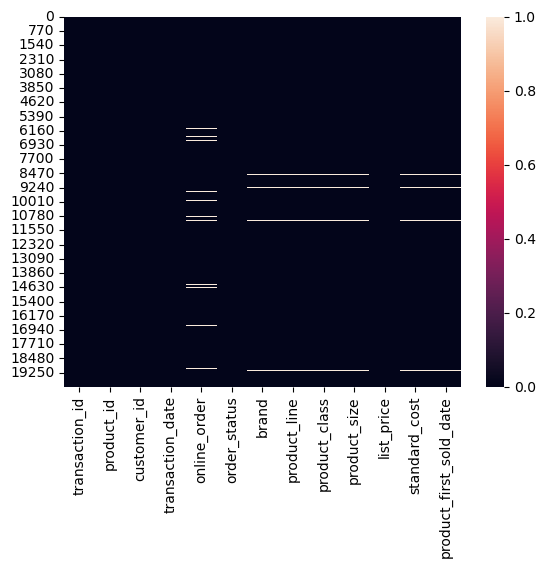

In [8]:
#to check for missing value with heatmap
sns.heatmap(customer_data.isnull())

# Exploratory Data Analysis (EDA)

In [9]:
# Customer Segmentation: Spending Analysis
customer_data_clean = customer_data[
    customer_data['order_status'] == 'Approved'
].copy()

# Aggregate customer spending
cust_spending = (
    customer_data_clean
    .groupby('customer_id', as_index=False)
    .agg(total_spent=('list_price', 'sum'))
)

# Quantile-based spending segmentation (robust)
cust_spending['spending_category'] = pd.qcut(
    cust_spending['total_spent'],
    q=3,
    labels=['Low', 'Medium', 'High'],
    duplicates='drop'
)

cust_spending.head()


,customer_id,total_spent,spending_category
0,1,9084.45,High
1,2,4149.07,Low
2,3,9888.23,High
3,4,1047.72,Low
4,5,5903.20,Medium


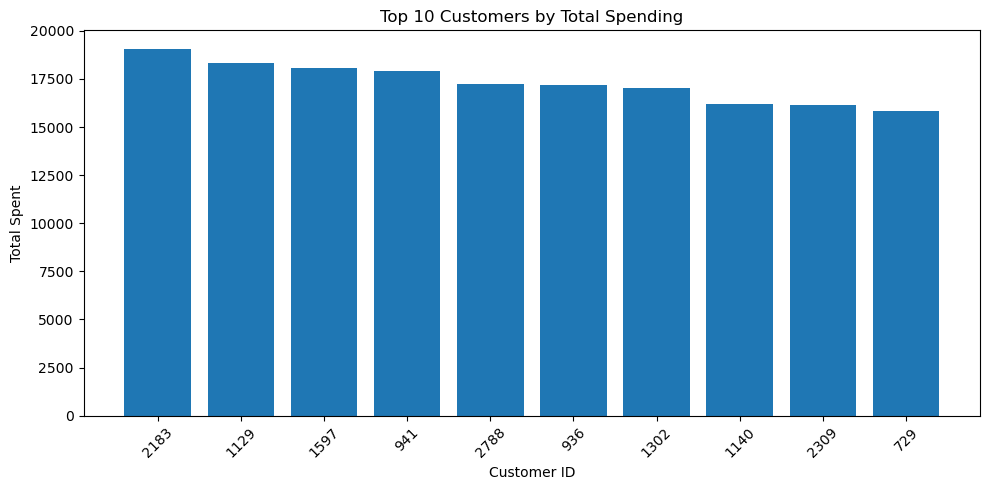

In [10]:
# Select top 10 customers by spending
top_customers = (
    cust_spending
    .sort_values('total_spent', ascending=False)
    .head(10)
)

# Convert customer_id to string for categorical plotting
top_customers['customer_id'] = top_customers['customer_id'].astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(
    top_customers['customer_id'],
    top_customers['total_spent']
)

plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

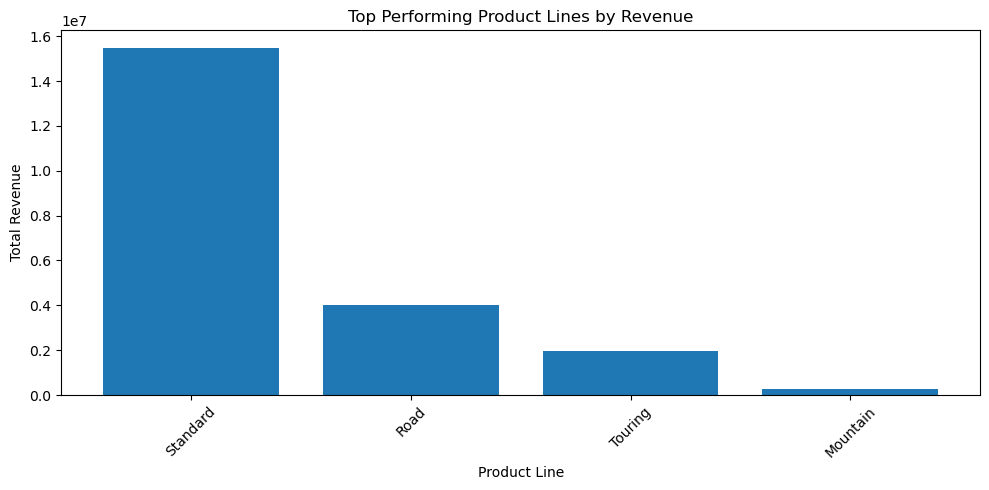

In [11]:
# Product Performance Analysis

# Filter valid transactions only
product_data = customer_data[
    (customer_data['order_status'] == 'Approved') &
    (customer_data['product_line'].notna())
].copy()

# Aggregate revenue by product line
top_products = (
    product_data
    .groupby('product_line', as_index=False)
    .agg(total_revenue=('list_price', 'sum'))
    .sort_values('total_revenue', ascending=False)
)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(top_products['product_line'], top_products['total_revenue'])
plt.title('Top Performing Product Lines by Revenue')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


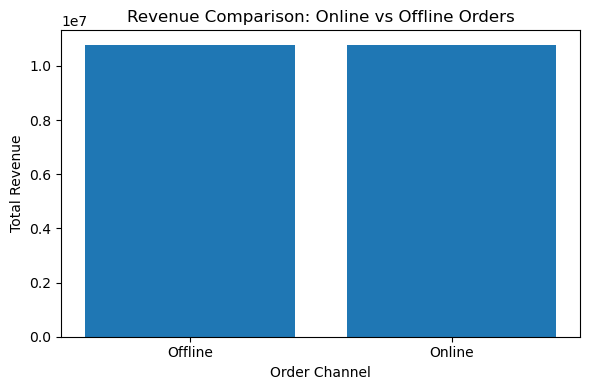

In [12]:
# Online vs. Offline Orders
channel_data = customer_data[
    (customer_data['order_status'] == 'Approved') &
    (customer_data['online_order'].notna())
].copy()

# Aggregate revenue by channel
online_vs_offline = (
    channel_data
    .groupby('online_order')
    .agg(total_revenue=('list_price', 'sum'))
)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(
    ['Offline', 'Online'],
    online_vs_offline.loc[[0.0, 1.0], 'total_revenue']
)

plt.title('Revenue Comparison: Online vs Offline Orders')
plt.ylabel('Total Revenue')
plt.xlabel('Order Channel')
plt.tight_layout()
plt.show()

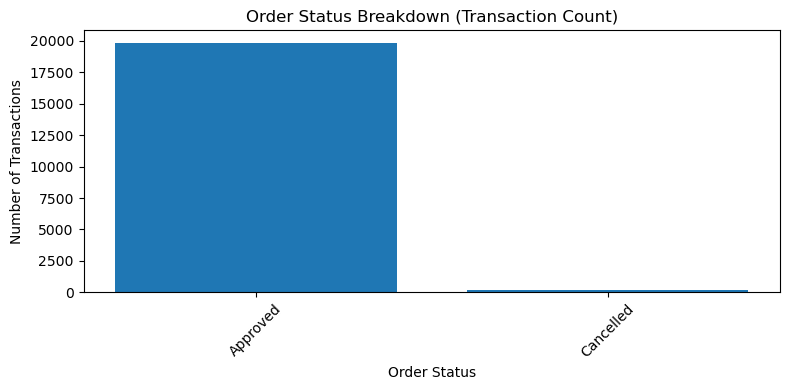

In [13]:
# Order Status Breakdown
order_status_counts = customer_data['order_status'].value_counts()

# Plot
plt.figure(figsize=(8, 4))
plt.bar(
    order_status_counts.index,
    order_status_counts.values
)

plt.title('Order Status Breakdown (Transaction Count)')
plt.xlabel('Order Status')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

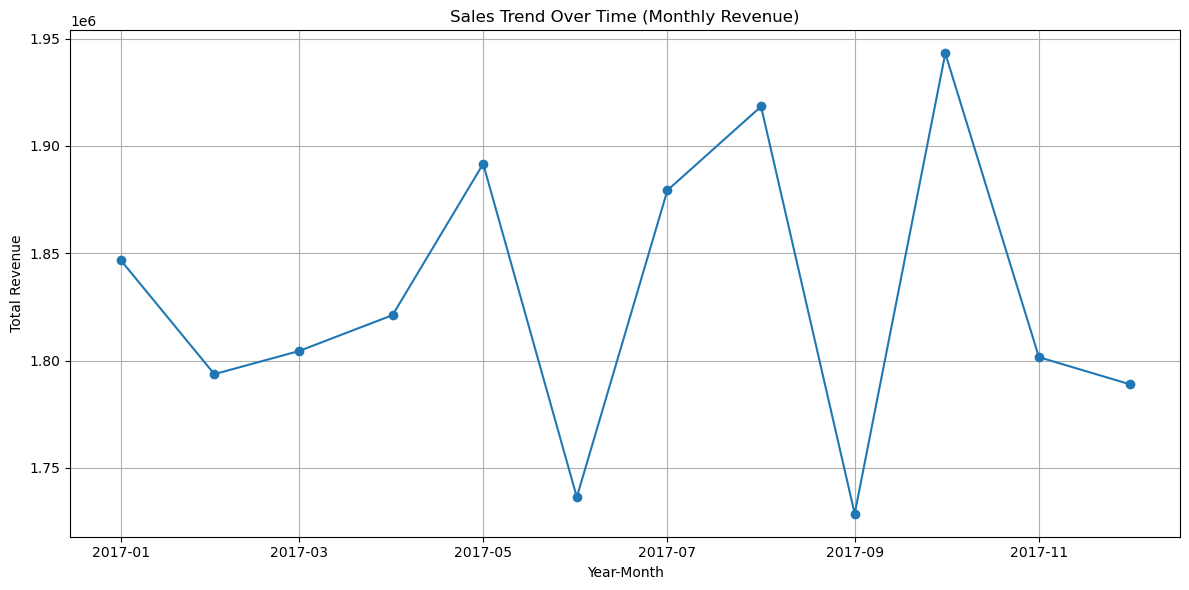

In [14]:
# Sales Trends Over Time
sales_data = customer_data[
    customer_data['order_status'] == 'Approved'
].copy()

# Create year-month column safely
sales_data['year_month'] = sales_data['transaction_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate monthly revenue
sales_trend = (
    sales_data
    .groupby('year_month')
    .agg(total_revenue=('list_price', 'sum'))
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    sales_trend.index,
    sales_trend['total_revenue'],
    marker='o',
    linestyle='-'
)

plt.title('Sales Trend Over Time (Monthly Revenue)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

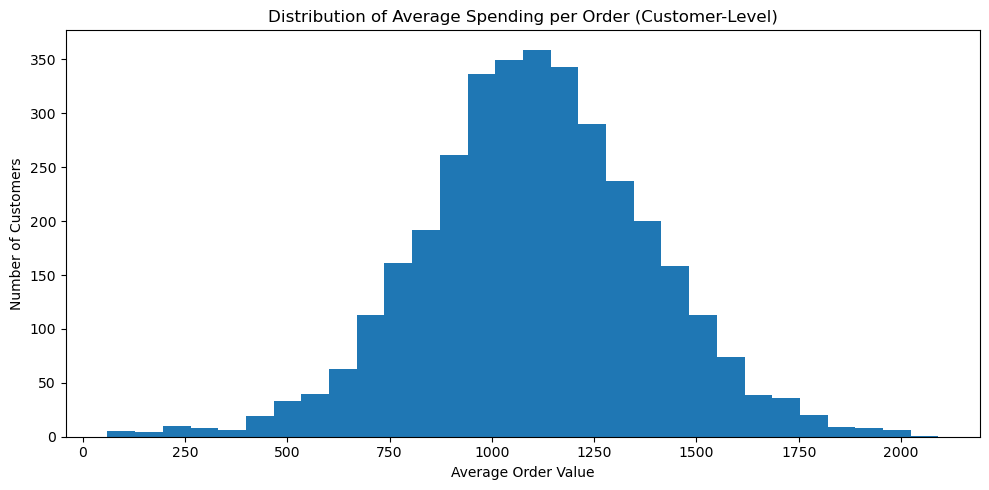

In [15]:
# Average Spending per Order
valid_orders = customer_data[
    customer_data['order_status'] == 'Approved'
].copy()

avg_spending_per_order = (
    valid_orders
    .groupby('customer_id')
    .agg(avg_order_value=('list_price', 'mean'))
)


plt.figure(figsize=(10, 5))
plt.hist(
    avg_spending_per_order['avg_order_value'],
    bins=30
)

plt.title('Distribution of Average Spending per Order (Customer-Level)')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

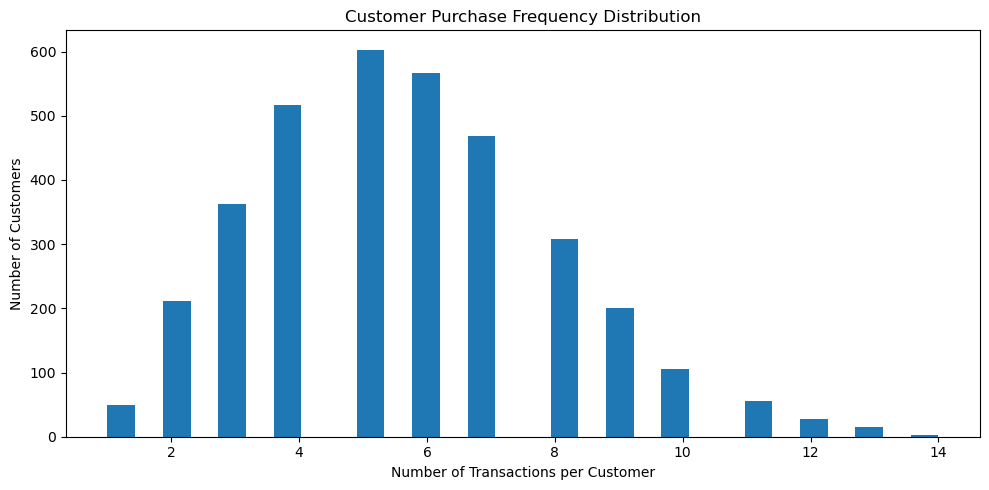

In [16]:
# Customer Purchase Frequency
valid_orders = customer_data[
    customer_data['order_status'] == 'Approved'
].copy()

purchase_frequency = (
    valid_orders
    .groupby('customer_id')
    .agg(transaction_count=('transaction_id', 'count'))
)


plt.figure(figsize=(10, 5))
plt.hist(
    purchase_frequency['transaction_count'],
    bins=30
)

plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Transactions per Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

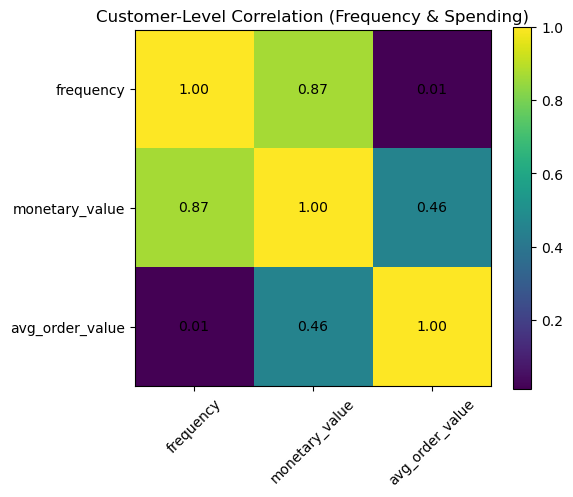

In [17]:
# Correlation Analysis
valid_orders = customer_data[
    customer_data['order_status'] == 'Approved'
].copy()

customer_metrics = (
    valid_orders
    .groupby('customer_id')
    .agg(
        frequency=('transaction_id', 'count'),
        monetary_value=('list_price', 'sum'),
        avg_order_value=('list_price', 'mean')
    )
)

corr_matrix = customer_metrics.corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center')

plt.title('Customer-Level Correlation (Frequency & Spending)')
plt.tight_layout()
plt.show()


## Handle Missing Values

In [18]:
# Check number of missing values in each column
missing_values = customer_data.isnull().sum()

# Display missing value count
print("Missing Values:\n", missing_values)

Missing Values:
 transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


In [19]:
# Handle missing values
customer_data = customer_data.copy()

customer_data['online_order'] = customer_data['online_order'].fillna(
    customer_data['online_order'].mode()[0]
)

customer_data['brand'] = customer_data['brand'].fillna(
    customer_data['brand'].mode()[0]
)

customer_data['product_line'] = customer_data['product_line'].fillna(
    customer_data['product_line'].mode()[0]
)

customer_data['product_class'] = customer_data['product_class'].fillna(
    customer_data['product_class'].mode()[0]
)

customer_data['product_size'] = customer_data['product_size'].fillna(
    customer_data['product_size'].mode()[0]
)

customer_data['standard_cost'] = customer_data['standard_cost'].fillna(
    customer_data['standard_cost'].median()
)

customer_data['product_first_sold_date'] = customer_data['product_first_sold_date'].fillna(
    customer_data['product_first_sold_date'].min()
)

# Store cleaned data
customer_clean_data = customer_data.copy()

# Verify no missing values remain
print(customer_clean_data.isnull().sum())

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64


In [20]:
# Ensure transaction_date is in datetime format
customer_clean_data['transaction_date'] = pd.to_datetime(
    customer_clean_data['transaction_date']
)

In [21]:
customer_clean_data.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

## Feature Engineering

In [22]:
customer_clean_data['total_spent'] = customer_clean_data['list_price']

# Profit per transaction
customer_clean_data['profit_margin'] = (
    customer_clean_data['list_price'] - customer_clean_data['standard_cost']
)

# Monetary value per customer
customer_clean_data['monetary_value'] = (
    customer_clean_data.groupby('customer_id')['total_spent']
    .transform('sum')
)

# Purchase frequency per customer
customer_clean_data['frequency'] = (
    customer_clean_data.groupby('customer_id')['transaction_id']
    .transform('count')
)

# Recency (days since last purchase)
latest_date = customer_clean_data['transaction_date'].max()
customer_clean_data['recency'] = (
    latest_date - customer_clean_data['transaction_date']
).dt.days

# Average spend per transaction
customer_clean_data['avg_spend'] = (
    customer_clean_data['total_spent'] / customer_clean_data['frequency']
)

# Profit per transaction
customer_clean_data['total_profit'] = customer_clean_data['profit_margin']

# Preview data
print(customer_clean_data.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  total_spent  \
0       71.49         

In [23]:
customer_clean_data.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
total_spent                       float64
profit_margin                     float64
monetary_value                    float64
frequency                           int64
recency                             int64
avg_spend                         float64
total_profit                      float64
dtype: object

In [24]:
customer_clean_data.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               20000
order_status               20000
brand                      20000
product_line               20000
product_class              20000
product_size               20000
list_price                 20000
standard_cost              20000
product_first_sold_date    20000
total_spent                20000
profit_margin              20000
monetary_value             20000
frequency                  20000
recency                    20000
avg_spend                  20000
total_profit               20000
dtype: int64

## Data preprocessing

In [25]:
# Drop columns that exist
columns_to_drop = [
    'transaction_id', 'product_id', 'brand', 'product_first_sold_date',
    'year_month', 'order_status', 'product_class', 'product_size',
    'product_line'
]

existing_cols = [col for col in columns_to_drop if col in customer_clean_data.columns]
customer_clean_data = customer_clean_data.drop(columns=existing_cols)

In [26]:
customer_clean_data.isnull().sum()

customer_id         0
transaction_date    0
online_order        0
list_price          0
standard_cost       0
total_spent         0
profit_margin       0
monetary_value      0
frequency           0
recency             0
avg_spend           0
total_profit        0
dtype: int64

In [27]:
customer_clean_data.count()

customer_id         20000
transaction_date    20000
online_order        20000
list_price          20000
standard_cost       20000
total_spent         20000
profit_margin       20000
monetary_value      20000
frequency           20000
recency             20000
avg_spend           20000
total_profit        20000
dtype: int64

In [28]:
final_customer_df = customer_clean_data.groupby('customer_id').agg(
    recency=('recency', 'min'),
    frequency=('frequency', 'max'),
    monetary_value=('monetary_value', 'max'),
    avg_spend=('avg_spend', 'mean'),
    total_profit=('total_profit', 'sum')
).reset_index()

## Detect and clean outliers

In [29]:
# Select numeric columns for outlier detection
numeric_cols = ['recency', 'frequency', 'monetary_value', 'avg_spend', 'total_profit']

# Copy DataFrame
clean_customer_df = final_customer_df.copy()

# Clip outliers in numeric columns (1st to 99th percentile)
for col in numeric_cols:
    lower = clean_customer_df[col].quantile(0.01)
    upper = clean_customer_df[col].quantile(0.99)
    clean_customer_df[col] = clean_customer_df[col].clip(lower, upper)

# Show shape of cleaned DataFrame
print(clean_customer_df.shape)

(3494, 6)


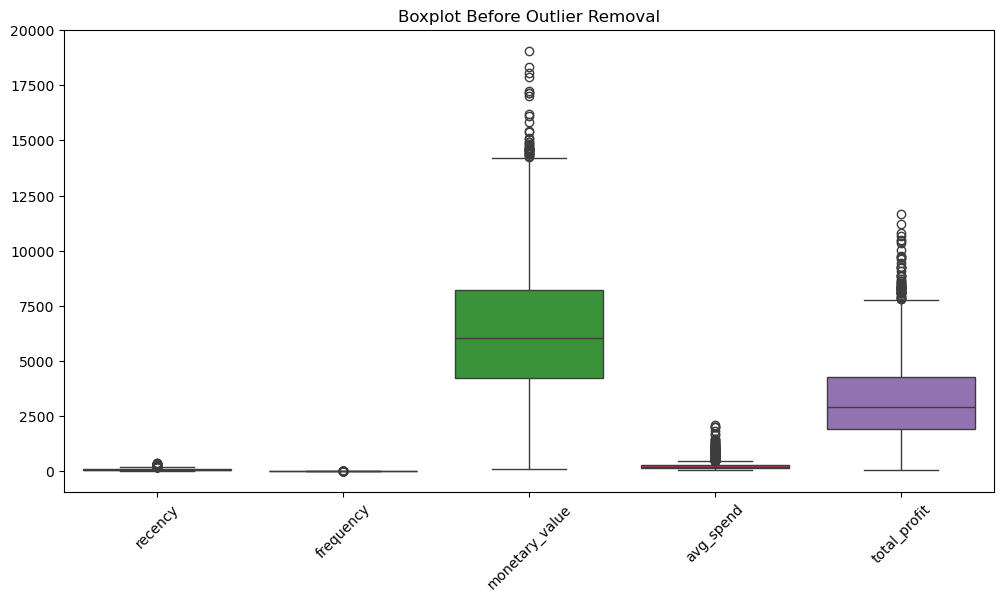

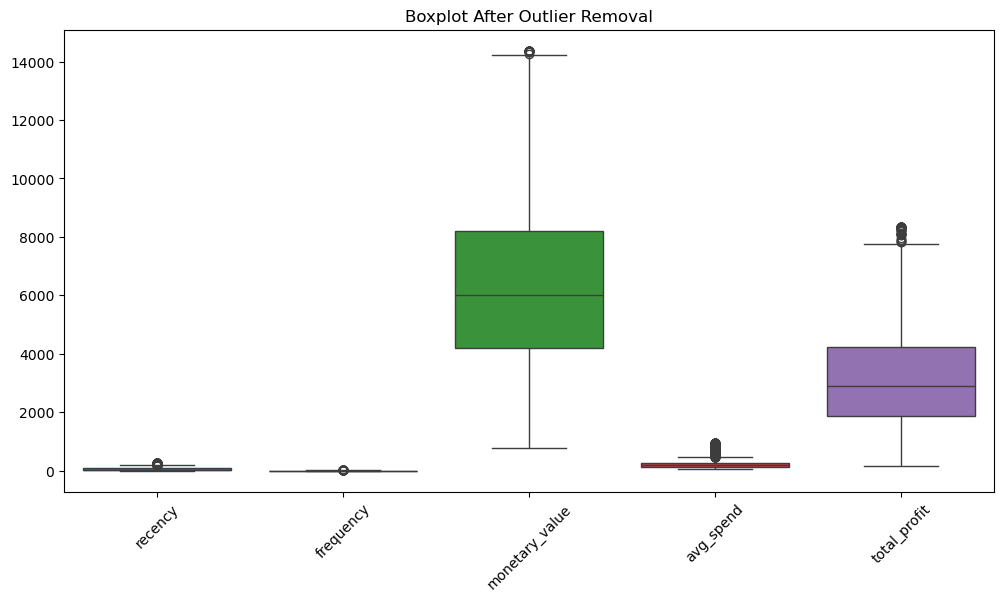

In [30]:
# Boxplot before outlier removal
plt.figure(figsize=(12,6))
sns.boxplot(data=final_customer_df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Before Outlier Removal")
plt.show()

# Boxplot after outlier removal
plt.figure(figsize=(12,6))
sns.boxplot(data=clean_customer_df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Removal")
plt.show()

## Feature Scaling

In [31]:
# Select numeric features to scale
features_to_scale = ['recency', 'frequency', 'monetary_value', 'avg_spend', 'total_profit']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(clean_customer_df[features_to_scale])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale, index=clean_customer_df.index)

# keep customer_id for reference
scaled_df['customer_id'] = clean_customer_df['customer_id'].values

# Preview
scaled_df.head()

,recency,frequency,monetary_value,avg_spend,total_profit,customer_id
0,-0.945653,2.289897,0.943731,-1.069216,-0.076846,1
1,1.192542,-1.178200,-0.748925,1.487690,-0.530750,2
2,0.733095,0.989361,1.219399,-0.542997,0.120759,3
3,2.376501,-1.611712,-1.812576,0.168737,-1.680478,4
4,-0.786614,0.122336,-0.147322,-0.480227,-0.434057,5


## KMEANS CLUSTER

### Elbow Method: Find optimal K

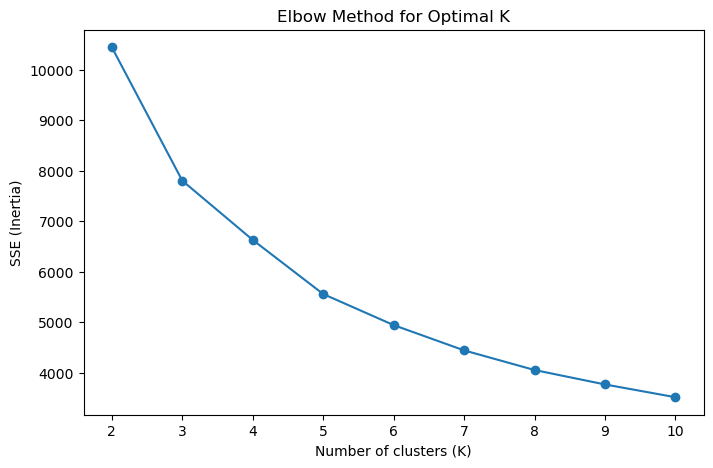

In [32]:
# Features to use for clustering
X = scaled_df[['recency', 'frequency', 'monetary_value', 'avg_spend', 'total_profit']]

# Try different K values
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

### Silhouette Score: Validate K

In [33]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for K={k}: {score:.4f}")

Silhouette Score for K=2: 0.3364
Silhouette Score for K=3: 0.3186
Silhouette Score for K=4: 0.2515
Silhouette Score for K=5: 0.2706
Silhouette Score for K=6: 0.2470
Silhouette Score for K=7: 0.2565
Silhouette Score for K=8: 0.2466
Silhouette Score for K=9: 0.2450
Silhouette Score for K=10: 0.2418


### Fit K-Means with chosen K

In [34]:
optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
scaled_df['Cluster'] = kmeans.fit_predict(X)

# Preview cluster assignment
scaled_df[['customer_id', 'Cluster']].head()

,customer_id,Cluster
0,1,0
1,2,1
2,3,0
3,4,1
4,5,2


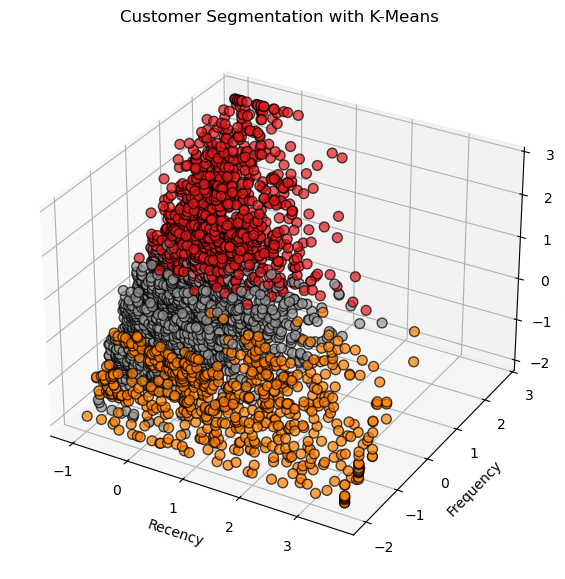

In [35]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    scaled_df['recency'], 
    scaled_df['frequency'], 
    scaled_df['monetary_value'], 
    c=scaled_df['Cluster'], 
    cmap='Set1', 
    s=50, alpha=0.7, edgecolor='k'
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('Customer Segmentation with K-Means')
plt.show()

1️⃣ Frequency (Purchase Count)

Cluster 0 : High frequency – these customers purchase most often.

Clusters 1 & 2 : Lower purchase frequency, typically 4–7 transactions.

Insight:
Cluster 0 represents your most engaged repeat buyers. Clusters 1 & 2 could benefit from loyalty programs or targeted promotions to boost purchase frequency.

 2️⃣ Monetary Value (Total Spending)

Cluster 0 : Highest spending, with some customers spending $18,000+.

Clusters 1 & 2 : Lower spending, mostly below $8,000.

Insight:
Cluster 0 are your high-value customers—ideal for premium offers, VIP programs, or exclusive deals. Clusters 1 & 2 are more budget-conscious and may respond better to discounts, bundling, or installment offers.

 3️⃣ Recency (Days Since Last Purchase)

Cluster 2 : Highest recency (250–400 days) – haven’t shopped in a long time.

Cluster 1 : Mixed recency – includes both recent and long-lost customers.

Cluster 0 : Lowest recency – recently active buyers.

Insight:

Cluster 2 = lost/inactive customers → needs reactivation campaigns (emails, retargeting, discounts).

Cluster 1 = recent buyers → engage with follow-ups, cross-sell, or upsell.

 🔹 Overall Business Implications
 
Cluster	Characteristics	Recommended Actions
0 	High frequency & high spending	Reward loyalty, premium offers, VIP programs
1 	Recent buyers, moderate spending	Upsell, cross-sell, personalized promotions
2 	Low frequency & low spending, long inactive	Win-back campaigns, reactivation discounts

In [36]:
scaled_df[['customer_id', 'Cluster']]

,customer_id,Cluster
0,1,0
1,2,1
2,3,0
3,4,1
4,5,2
...,...,...
3489,3497,1
3490,3498,2
3491,3499,0
3492,3500,2


In [37]:
# Merge clusters into customer_data_clean
customer_clean_data = customer_clean_data.merge(
    scaled_df[['customer_id', 'Cluster']],
    on='customer_id',
    how='left'
)

In [38]:
# Define meaningful cluster names
cluster_names = {
    0: "VIP Customers",
    1: "Loyal Customers",
    2: "Infrequent Buyers"
}

# Map cluster numbers to names
# Use .loc to avoid SettingWithCopyWarning
customer_clean_data = customer_clean_data.copy()  # ensure we are working on a safe copy
customer_clean_data.loc[:, 'Cluster_Name'] = customer_clean_data['Cluster'].map(cluster_names)

# Preview the cluster labels
print(customer_clean_data[['Cluster', 'Cluster_Name']].head())

   Cluster       Cluster_Name
0        2  Infrequent Buyers
1        0      VIP Customers
2        0      VIP Customers
3        0      VIP Customers
4        0      VIP Customers


In [39]:
customer_clean_data

,customer_id,transaction_date,online_order,list_price,standard_cost,total_spent,profit_margin,monetary_value,frequency,recency,avg_spend,total_profit,Cluster,Cluster_Name
0,2950,2017-02-25,0.0,71.49,53.62,71.49,17.87,1953.15,3,308,23.830000,17.87,2,Infrequent Buyers
1,3120,2017-05-21,1.0,2091.47,388.92,2091.47,1702.55,7351.70,7,223,298.781429,1702.55,0,VIP Customers
2,402,2017-10-16,0.0,1793.43,248.82,1793.43,1544.61,8148.22,6,75,298.905000,1544.61,0,VIP Customers
3,3135,2017-08-31,0.0,1198.46,381.10,1198.46,817.36,7539.81,7,121,171.208571,817.36,0,VIP Customers
4,787,2017-10-01,1.0,1765.30,709.48,1765.30,1055.82,11292.54,10,90,176.530000,1055.82,0,VIP Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1018,2017-06-24,1.0,2005.66,1203.40,2005.66,802.26,6164.88,5,189,401.132000,802.26,2,Infrequent Buyers
19996,127,2017-11-09,1.0,416.98,312.74,416.98,104.24,9949.62,10,51,41.698000,104.24,0,VIP Customers
19997,2284,2017-04-14,1.0,1636.90,44.71,1636.90,1592.19,7556.94,7,260,233.842857,1592.19,0,VIP Customers
19998,2764,2017-07-03,0.0,227.88,136.73,227.88,91.15,3651.92,4,180,56.970000,91.15,2,Infrequent Buyers
